In [18]:
%matplotlib inline

from __future__ import print_function
import matplotlib.pyplot as plt
import pyart
import numpy as np
from scipy import ndimage, signal
import time
from matplotlib.ticker import Formatter

sweep  = 0
x_lims = [0, 20]
y_lims = [0, 4]
v_min  = -20
v_max  = 20
fig_sz = [20, 10]
c_lbl  = 'Velocity (kts)'
p_data = 'velocity'
root_path = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/'
nyq       = 50

In [19]:
def plot_rhi(fn,subpl,c_flag,x_label,y_label):
    # read file
    # filename = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/20141106/031202.mdv'
    radar = pyart.io.read_mdv(fn)
    display = pyart.graph.RadarDisplay(radar)
    # plot velocity
    ax = fig.add_subplot(subpl)
    
    
    
    gatefilter = pyart.correct.GateFilter(radar)
    gatefilter.exclude_below(p_data,-10)
    gatefilter.exclude_above(p_data,10)
    corr_vel = pyart.correct.dealias_region_based(
        radar, vel_field='velocity', keep_original=False, 
        gatefilter = gatefilter, nyquist_vel=nyq, centered = True)
    radar.add_field('corrected_velocity', corr_vel, replace_existing = True)
    
    corr_vel = radar.fields['corrected_velocity']['data']
    corr_vel = corr_vel*1.94384
    radar.add_field_like('corrected_velocity', 
           'corrected_velocity_knots', 
          corr_vel, replace_existing = True)  
  
    
    
#    smooth_corr_vel = np.zeros_like(corr_vel)
#    for i in range(smooth_corr_vel.shape[0]):
#        smooth_corr_vel[i,:] = \
#        pyart.correct.phase_proc.smooth_and_trim(corr_vel[i,:], 8)
#        
#    radar.add_field_like('corrected_velocity', 
#            'smooth_corrected_velocity', 
#            smooth_corr_vel, replace_existing = True)
    
    
    display.plot_rhi('corrected_velocity_knots', sweep=sweep, 
                     vmin=v_min, vmax=v_max, fig=fig, ax=ax,
                     colorbar_flag=c_flag, cmap = pyart.graph.cm.BuDRd18,
                     title = '', axislabels = (x_label,y_label))
    display.set_limits(xlim=x_lims, ylim=y_lims)
    
    
    plt.yticks([1,2,3])
    plt.xticks([0,5,10,15,20])
        
    ax.xaxis.grid(ls='-')
    ax.yaxis.grid(ls='-')
    #to do:
    
    #figure colorbar on rhs for all subplots
    #generate colormap for -10 to 15 centred on 0
    #major yticks (with numbers) at 2 and 4
    #y grid lines at 1,2,3,4
    #x axis is good!    

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)

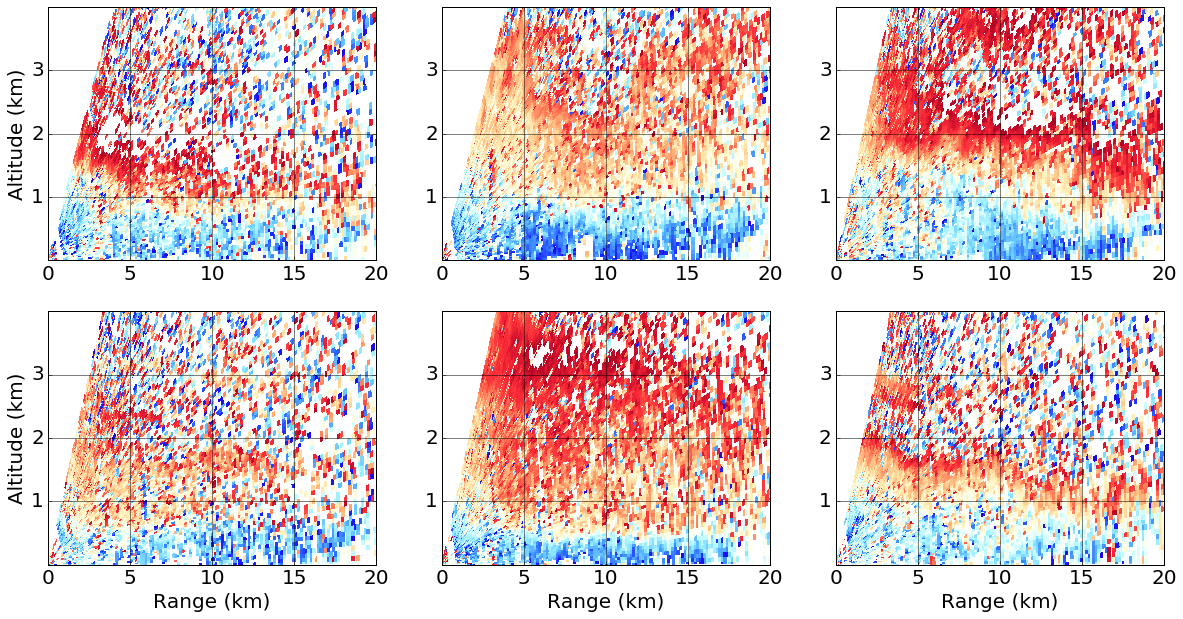

In [20]:
fig = plt.figure(figsize=fig_sz)

fn = '20141106/031202.mdv'
plot_rhi(root_path + fn,231,0,'','Altitude (km)')
fn = '20141127/050001.mdv'
plot_rhi(root_path + fn,232,0,'','')
fn = '20141209/043002.mdv'
plot_rhi(root_path + fn,233,0,'','')
fn = '20141211/025402.mdv'
plot_rhi(root_path + fn,234,0,'Range (km)','Altitude (km)')
fn = '20141217/053602.mdv'
plot_rhi(root_path + fn,235,0,'Range (km)','')
fn = '20141218/030001.mdv'
plot_rhi(root_path + fn,236,0,'Range (km)','')
#fn = '20150119/030045.mdv'
#plot_rhi(root_path + fn,326)

plt.savefig('tmp/CP2_seabreezes.png', dpi=200)

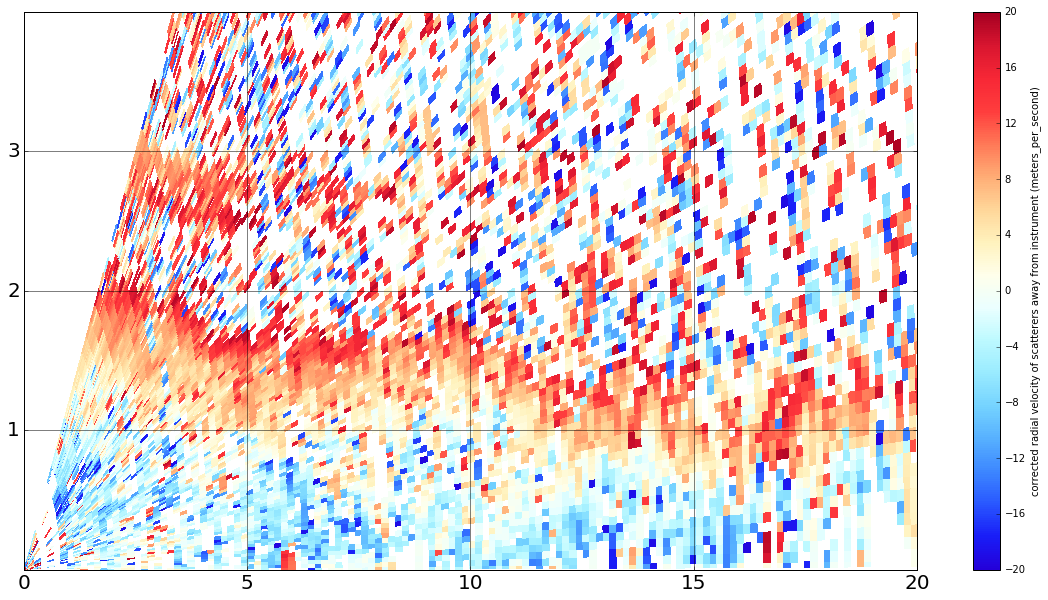

In [21]:
fig = plt.figure(figsize=fig_sz)
fn = '20141218/030001.mdv'
plot_rhi(root_path + fn,111,1,'','')
plt.savefig('tmp/CP2_seabreezes_cmap.png', dpi=200)